In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_envio_portos = pd.read_csv(r'C:\Users\Pc\Downloads\data.csv')

In [4]:
df_envio_portos.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


In [5]:
df_envio_portos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
valid_import         120 non-null bool
item                 120 non-null object
importer_id          120 non-null int64
exporter_id          120 non-null int64
country_of_origin    120 non-null object
declared_quantity    120 non-null int64
declared_cost        120 non-null float64
mode_of_transport    120 non-null object
route                120 non-null object
date_of_departure    120 non-null object
date_of_arrival      120 non-null object
declared_weight      120 non-null float64
actual_weight        120 non-null float64
days_in_transit      120 non-null float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


In [6]:
df_envio_portos.shape

(120, 14)

In [7]:
df_envio_portos.describe()

,importer_id,exporter_id,declared_quantity,declared_cost,declared_weight,actual_weight,days_in_transit
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
mean,111.0,222.0,127.458333,6743.649881,1264.702934,1306.429806,35.424705
std,0.0,0.0,14.641311,2991.797050,633.149971,656.911704,26.571591
min,111.0,222.0,100.000000,1441.012419,18.459509,19.275241,12.410325
25%,111.0,222.0,115.750000,4442.903914,820.314400,841.763738,18.225625
50%,111.0,222.0,131.500000,6010.218745,1255.597743,1305.716419,27.044293
75%,111.0,222.0,139.000000,8887.095370,1711.314045,1763.681083,44.356374
max,111.0,222.0,149.000000,14281.325362,2806.338955,2918.681683,147.787560


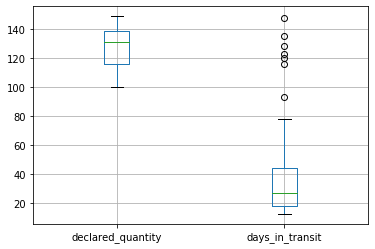

In [8]:
df_envio_portos [['declared_quantity', 'days_in_transit' ]].boxplot()

Análise de Regressão

In [9]:
x = df_envio_portos['declared_weight'].values #Variável independente
y = df_envio_portos['actual_weight'].values #Variável dependente

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()
x_reshaped = x.reshape((-1,1))
regressao = reg.fit (x_reshaped, y)

In [12]:
previsao = reg.predict(x_reshaped)

In [13]:
from sklearn.metrics import r2_score

In [14]:
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))
R_2 = r2_score(y, previsao)
print("Coeficiente de Determinação (R2):", R_2)

Y = [1.03718115]X -5.296233030439225
Coeficiente de Determinação (R2): 0.9993288165644932


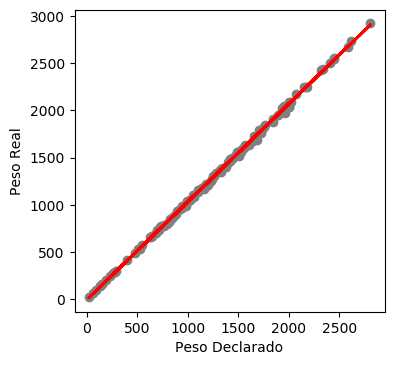

In [19]:
#realiza o plot dos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x, y,  color='gray') #realiza o plot do gráfico de dispersão
plt.plot(x, previsao, color='red', linewidth=2) # realiza o plto da "linha"
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")
plt.show()